In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

To perform the block binarization operation, the `binarizer` function was written.
It takes 3 arguments: the image, the number of splits on the vertical axis and
the number of splits on the horizontal axis.
The image is divided into equal sections. Their size is determined by the ratio
of the image size to the number of splits along each axis. If the size of the
image is not a multiple of the number of splits, then the last block in
the iteration of the cycle (these are the right and bottom edges of the image)
have a smaller size than all the other blocks. An empty matrix is created,
then, in the cycle, the binarization of individual blocks and the joining of these
blocks to the created matrix takes place. This is how the entire image is
processed, after which the function returns the processed image.

In [3]:
def binarizer(input_img, v_blocks, h_blocks):
    # This programs splits an image into 'v_blocks' blocks in vertical direction
    # and into 'h_blocks' blocks in horizontal direction. All the blocks are equal except the last ones.

    height, width = input_img.shape # size of the input image
    output_img = np.nan # output image
    temp = np.nan
    
    merge = lambda tmp, aim, n: aim if np.isnan(tmp).any() else np.concatenate((tmp, aim), axis=n)
    
    for row in range(v_blocks):
        # horizontal range
        row_start = row * np.floor(height / v_blocks)
        row_end = height if row == v_blocks - 1 else (row + 1) * np.floor(height / v_blocks)
            
        for col in range(h_blocks):
            # horizontal range
            col_start = col  * np.floor(width / h_blocks)
            col_end = width if col == width - 1 else (col + 1) * np.floor(width / h_blocks)

            _, img_bin = cv2.threshold(input_img[int(row_start):int(row_end), int(col_start):int(col_end)], 0, 255, cv2.THRESH_OTSU)
            temp = merge(temp, img_bin, 1)
        output_img = merge(output_img, temp, 0)
        temp = np.nan
    
    return output_img

Function `plot_binarized` is intended to plot image binarized without using blocks
and with blocks. For reading and processing image OpenCV library is used.
First of all, we upload an image. We are looking for the binarization threshold
for the entire image using the graythresh function. Then, we build a histogram
and add a line to the histogram indicating the binarization threshold.

In [4]:
def plot_binarized(img_path, v_blocks, h_blocks):
    im = cv2.imread(img_path, 0)
    thresh, im_bin = cv2.threshold(im, 0, 255, cv2.THRESH_OTSU) # threshold for binarization

    fig1, axes = plt.subplots(2, 2, figsize=(10, 10))
    axes[0][0].imshow(im, cmap='gray')
    axes[0][0].set_title('Original image')
    axes[0][1].hist(im.ravel(), 256, [0,256])
    axes[0][1].axvline(np.around(thresh), color='r') # threshold marker
    axes[0][1].set_title('Image histogram\nRed line - threshold ({})'.format(thresh))

    axes[1][0].imshow(im_bin, cmap='gray')
    axes[1][0].set_title('Whole image binarization')

    # binarizing using blocks
    im_bin_block = binarizer(im, v_blocks, h_blocks)
    axes[1][1].imshow(im_bin_block, cmap='gray')
    axes[1][1].set_title('Block binarization: {} $\\times$ {} blocks'.format(v_blocks, h_blocks))
    plt.show()

# First image

Let's upload image with the rice grains and use 10 x 10 blocks.

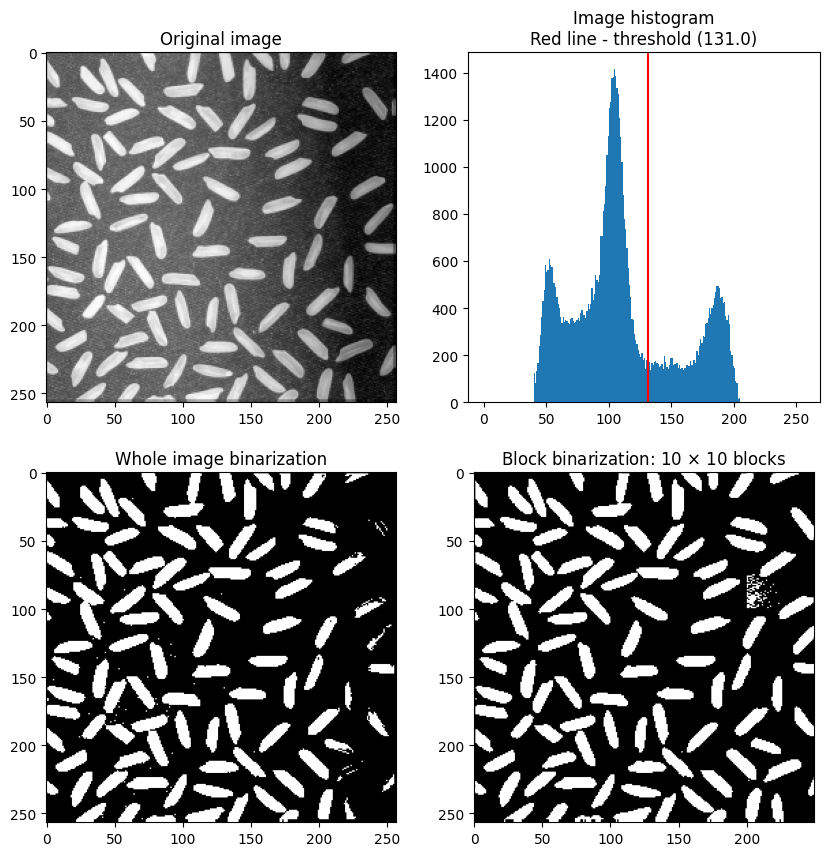

In [7]:
# Loading the 1st image
plot_binarized(img_path='rice.tif', v_blocks=10, h_blocks=10)

Comparing the obtained images, you can see that with block binarization, all the
drawings have clear edges, while in the right part of the left image they have
lost their integrity or disappeared from the image altogether. There are also no
extra white dots that are present on the left image in the left part.

# Second image

Upload the image "figure.png". We do the same operations with it as with the
first image.

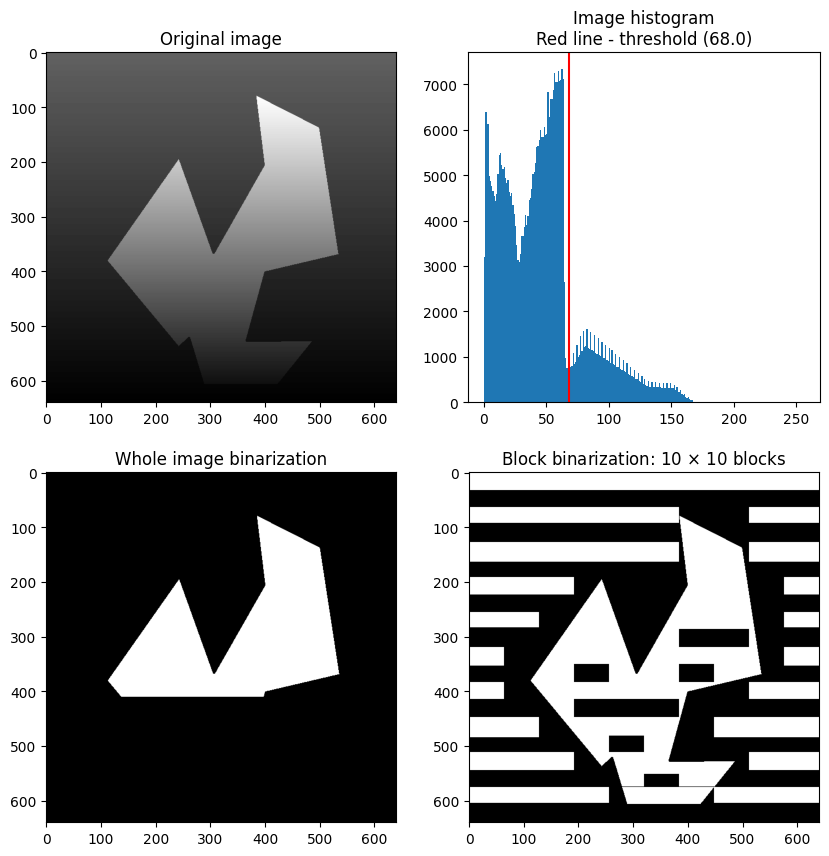

In [8]:
# Loading the 2nd image
plot_binarized(img_path='figure.png', v_blocks=  10, h_blocks=10)

It can be seen that both with conventional and block binarization, a bad result
is obtained. With binarization of the entire image, we get that only half of the
image is processed correctly, with block binarization, artifacts arise. This is
due to the low contrast of the image. From the histogram above, you can see that
most of the pixels have low intensity values.
Let's try to change the number and configuration of blocks to 10x1.

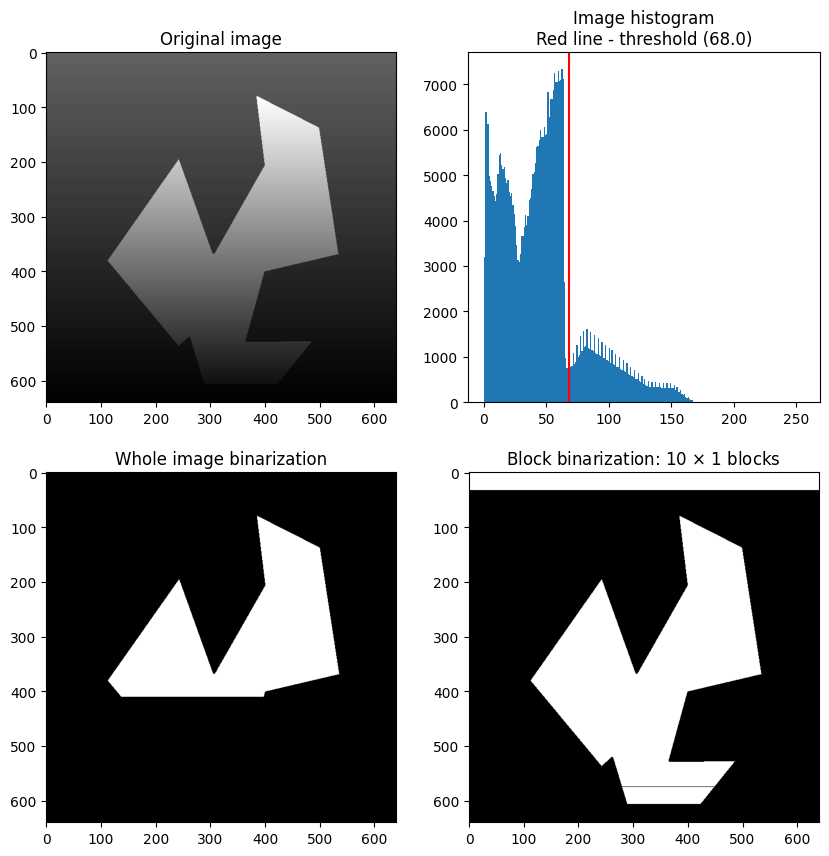

In [11]:
# Loading the 2nd image
plot_binarized(img_path='figure.png', v_blocks=  10, h_blocks=1)

It can be seen that in this case, block binarization gives an acceptable result.
And although the algorithm did not fully cope at the very bottom of the image,
block binarization gave a better result than binarization at the global threshold.
You can also apply similar reasoning to the first image and perform binarization
only along the horizontal axis.

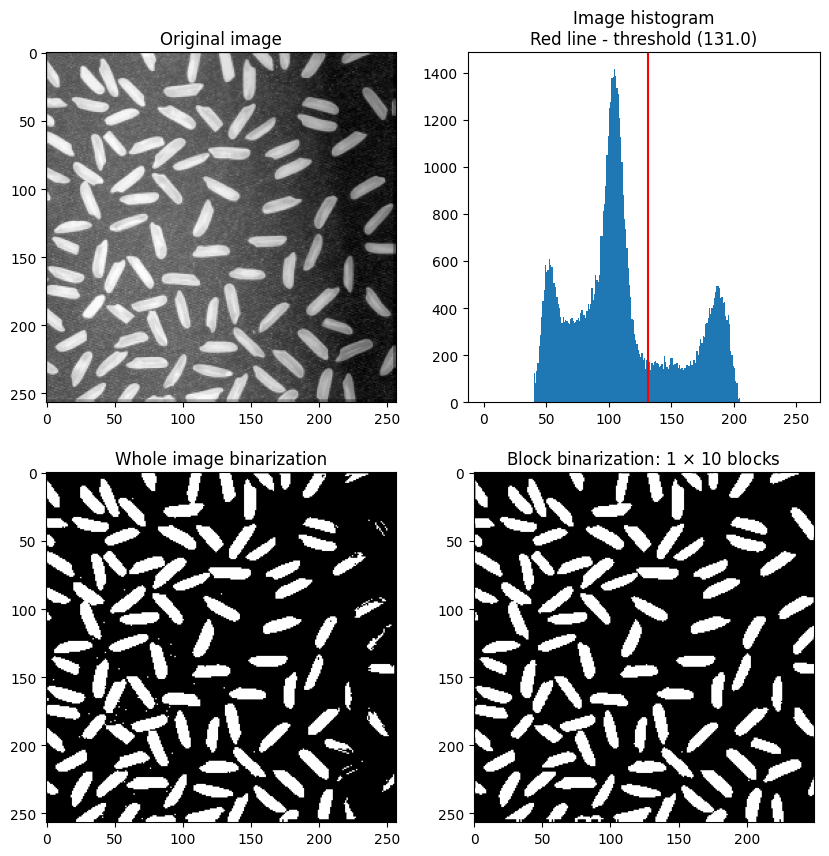

In [12]:
plot_binarized(img_path='rice.tif', v_blocks=1, h_blocks=10)

The result is identical to what is shown in the first section. However, there
are point artifacts in the right part of the figure that are not present
in image above, so we can say that block binarization along the change
in illumination coped better in this case.

# Conclusion

In this work, an algorithm for block binarization of an image was implemented
in the Python program with the choice of a separate threshold for each block,
for which a special binarize function was written.
The following results were obtained:
* the block binarization algorithm copes well with images
with high contrast
* the best results can be achieved if you split the image
along the change in illumination
* it follows from the previous paragraph that it is necessary to select the optimal
the number and size of blocks within which binarization will be performed.